# 연습문제 02 풀이

## #01. 패키지 준비하기

In [4]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

## #02. 데이터셋 준비하기

In [5]:
origin = read_excel("https://data.hossam.kr/G03/pima-indians.xlsx")

print(origin.info())

origin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## #03. 데이터 전처리

### 결측치 확인

In [6]:
origin.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 명목형 변수 형변환

In [7]:
origin['Outcome'] = origin['Outcome'].astype('category')
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


## #04. 탐색적 데이터 분석

### 기본통계 확인

In [8]:
origin.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### 상자그림

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

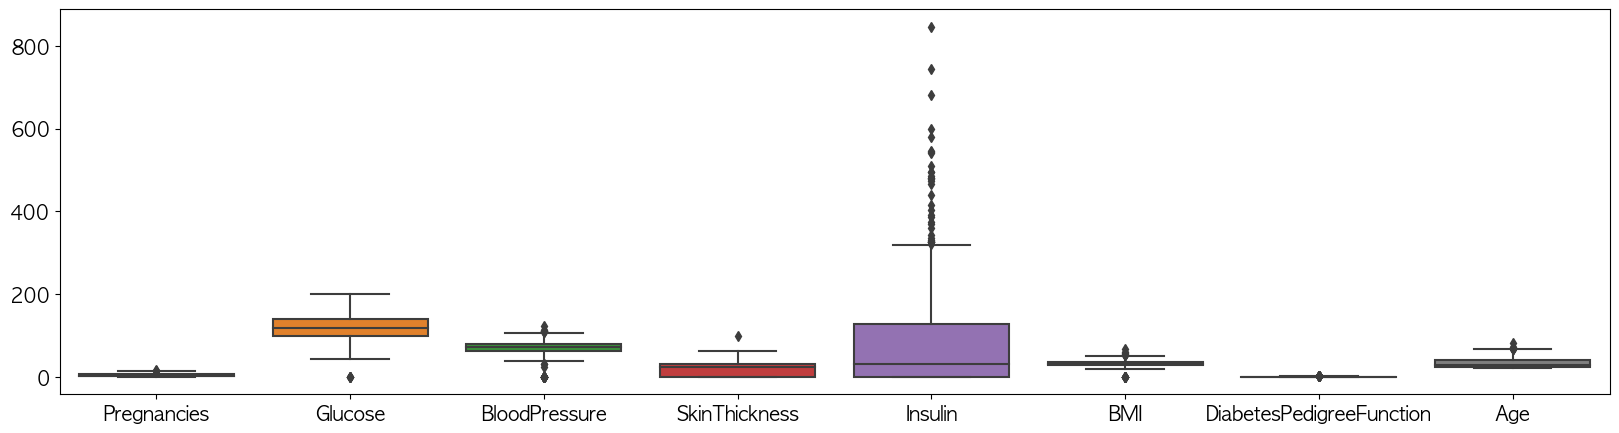

In [9]:
plt.figure(figsize=(20, 5))
sb.boxplot(data=origin)
plt.show()
plt.close()

> 데이터 분포가 서로 상이하므로 표준화가 필요하다고 판단

## #05. 데이터셋 분할하기

### 랜덤시드 고정

In [10]:
np.random.seed(777)

### 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [11]:
x = origin.drop('Outcome', axis=1)
y = origin[['Outcome']]
print(x.shape, y.shape)
y

(768, 8) (768, 1)


,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


### 데이터 표준화

In [12]:
x_scaller = StandardScaler()
x_scale = x_scaller.fit_transform(x)
x_scale_df = DataFrame(x_scale, columns=x.columns, index=x.index)
x_scale_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


### 훈련 데이터와 검증 데이터로 분할

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_scale_df, y, test_size=0.3, random_state=777)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
x_train

(537, 8) (231, 8) (537, 1) (231, 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
335,-1.141852,1.380375,0.356432,1.409094,1.521248,2.018958,-0.642912,-0.616111
130,0.046014,1.630752,0.046245,-0.410019,0.765836,-0.290972,-0.334860,-0.020496
255,-0.844885,-0.247076,-0.263941,0.907270,-0.692891,0.204013,0.214802,-1.041549
573,-0.547919,-0.716533,-0.470732,-0.221835,0.349057,0.343624,-0.827139,-0.956462
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
...,...,...,...,...,...,...,...,...
669,1.530847,1.036107,0.459827,0.593630,0.175399,-0.138669,-0.929823,1.000557
71,0.342981,0.566649,-0.263941,0.907270,0.522715,-0.430583,-0.183854,-0.616111
599,-0.844885,-0.372265,-1.608083,-0.159107,0.349057,-1.128639,-0.195934,-0.616111
571,-0.547919,0.284975,1.390387,-1.288212,-0.692891,-1.192099,-0.615731,-1.041549


## #06. 모델 개발

### 모델 정의

In [14]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(len(x_train.columns), )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습하기

In [15]:
result = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_test), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

Epoch 1/500


17/17 [==============================] - 0s 9ms/step - loss: 0.8094 - acc: 0.4432 - val_loss: 0.7764 - val_acc: 0.4156 - lr: 0.0010
Epoch 2/500
17/17 [==============================] - 0s 2ms/step - loss: 0.7297 - acc: 0.5009 - val_loss: 0.7124 - val_acc: 0.5368 - lr: 0.0010
Epoch 3/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6756 - acc: 0.5587 - val_loss: 0.6623 - val_acc: 0.6277 - lr: 0.0010
Epoch 4/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6304 - acc: 0.6555 - val_loss: 0.6196 - val_acc: 0.6883 - lr: 0.0010
Epoch 5/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5931 - acc: 0.7095 - val_loss: 0.5843 - val_acc: 0.7532 - lr: 0.0010
Epoch 6/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5637 - acc: 0.7523 - val_loss: 0.5573 - val_acc: 0.7489 - lr: 0.0010
Epoch 7/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5393 - acc: 0.7635 - val_loss: 0.5352 - val_acc: 0.7576 - lr: 0.0010
Epoc

## #07. 학습 결과 평가

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

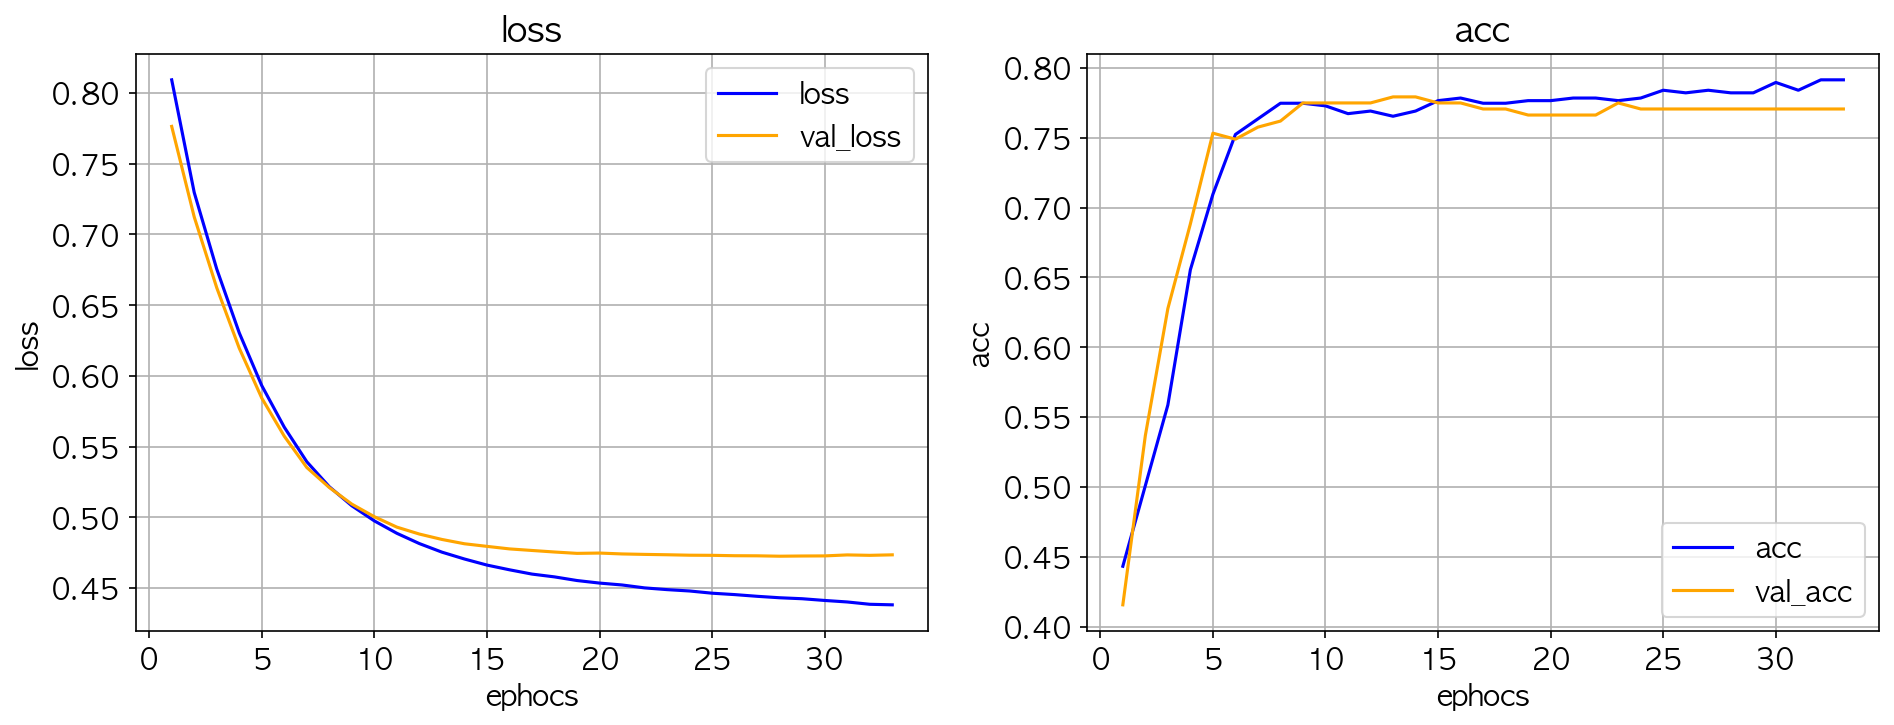

17/17 [==============================] - 0s 616us/step - loss: 0.4367 - acc: 0.7914
최종 훈련 손실률: 0.436678, 최종 훈련 정확도: 0.791434
8/8 [==============================] - 0s 750us/step - loss: 0.4734 - acc: 0.7706
최종 검증 손실률: 0.473425, 최종 검증 정확도: 0.770563


In [16]:
helper.tf_result_plot(result)

evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 정확도: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 정확도: %f" % (evaluate2[0], evaluate2[1]))

## #08. 학습 결과 적용

### 테스트 데이터에 대한 예측 결과 산정

In [17]:
train_pred = model.predict(x_train)
data_count, case_count = train_pred.shape
print("%d개의 훈련 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
print(train_pred)

17/17 [==============================] - 0s 507us/step
537개의 훈련 데이터가 1개의 경우의 수를 갖는다.
[[0.69389623]
 [0.7479534 ]
 [0.21295853]
 [0.05800727]
 [0.32340068]
 [0.06777223]
 [0.15374243]
 [0.40780178]
 [0.6443068 ]
 [0.1846609 ]
 [0.43385476]
 [0.2310364 ]
 [0.37365952]
 [0.0057029 ]
 [0.7972461 ]
 [0.49390897]
 [0.14522023]
 [0.4853021 ]
 [0.04602447]
 [0.12610865]
 [0.08139957]
 [0.19086635]
 [0.37489215]
 [0.22007237]
 [0.13909163]
 [0.10901189]
 [0.31749526]
 [0.01467365]
 [0.34878957]
 [0.05687889]
 [0.13858315]
 [0.13526985]
 [0.18472955]
 [0.7193877 ]
 [0.8103058 ]
 [0.6944753 ]
 [0.04459385]
 [0.22434552]
 [0.559069  ]
 [0.26982662]
 [0.18967007]
 [0.13479173]
 [0.02380628]
 [0.33820578]
 [0.02625588]
 [0.41621837]
 [0.57329136]
 [0.72141886]
 [0.11349009]
 [0.48819613]
 [0.03698329]
 [0.02779644]
 [0.17360161]
 [0.6377758 ]
 [0.15768324]
 [0.8525157 ]
 [0.18008634]
 [0.8514485 ]
 [0.29039678]
 [0.3077912 ]
 [0.06733678]
 [0.9226634 ]
 [0.16169848]
 [0.6799463 ]
 [0.1112641 ]
 [0.5

In [18]:
train_df = DataFrame({
    '관측치': y_train['Outcome'],
    '예측치': np.round(train_pred.flatten())
})

train_df

,관측치,예측치
335,0,1.0
130,1,1.0
255,1,0.0
573,0,0.0
764,0,0.0
...,...,...
669,0,1.0
71,0,0.0
599,0,0.0
571,0,0.0


### 검증 데이터에 대한 예측 결과 산정

In [19]:
test_pred = model.predict(x_test)
data_count, case_count = test_pred.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
print(test_pred)

8/8 [==============================] - 0s 659us/step
231개의 검증 데이터가 1개의 경우의 수를 갖는다.
[[0.40095523]
 [0.9516289 ]
 [0.905169  ]
 [0.1935497 ]
 [0.25698367]
 [0.6526251 ]
 [0.633119  ]
 [0.07233427]
 [0.9644116 ]
 [0.20278858]
 [0.05705776]
 [0.09363363]
 [0.03360582]
 [0.04896075]
 [0.35373732]
 [0.07982156]
 [0.09737824]
 [0.26488718]
 [0.7078544 ]
 [0.15363467]
 [0.09008979]
 [0.42658618]
 [0.8111441 ]
 [0.81116545]
 [0.15677005]
 [0.16413853]
 [0.04483289]
 [0.7165448 ]
 [0.05567434]
 [0.48424512]
 [0.09888791]
 [0.10566156]
 [0.20640491]
 [0.02850297]
 [0.15838924]
 [0.04618636]
 [0.16586217]
 [0.16363615]
 [0.75191826]
 [0.01336453]
 [0.07724372]
 [0.26825833]
 [0.06279694]
 [0.8886116 ]
 [0.6562658 ]
 [0.02130771]
 [0.11308241]
 [0.12869391]
 [0.05562247]
 [0.08941808]
 [0.79166836]
 [0.06266825]
 [0.01663727]
 [0.39209822]
 [0.16032965]
 [0.10411926]
 [0.05242092]
 [0.93513983]
 [0.4971854 ]
 [0.85028225]
 [0.3146971 ]
 [0.7520268 ]
 [0.8476042 ]
 [0.68797666]
 [0.40670013]
 [0.072

### 결과 데이터 셋 구성

In [20]:
test_df = DataFrame({
    '관측치': y_test['Outcome'],
    '예측치': np.round(test_pred.flatten())
})

test_df

,관측치,예측치
387,1,0.0
43,1,1.0
408,1,1.0
262,0,0.0
533,0,0.0
...,...,...
46,0,1.0
290,0,0.0
418,0,0.0
434,0,0.0


### 결과 확인

In [21]:
logit = helper.tf_logit_result(model, result, x_train, y_train)
logit

17/17 [==============================] - 0s 540us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
logit.cmdf

,Negative,Positive
True,300,71
False,41,125


In [23]:
logit.result_df.T

,0
정확도(Accuracy),0.791434
정밀도(Precision),0.753012
"재현율(Recall, TPR)",0.637755
"위양성율(Fallout, FPR)",0.120235
"특이성(Specificity, TNR)",0.879765
RAS,0.758760
f1_score,0.690608


In [24]:
logit.odds_rate_df

array([0.6251431], dtype=float32)